In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tunguz/big-five-personality-test")

print("Path to dataset files:", path)

100%|██████████| 159M/159M [00:02<00:00, 56.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/tunguz/big-five-personality-test/versions/1


In [2]:
import pandas as pd
import numpy as np
import pyspark as psp
import os
import ast
import seaborn as sns
import matplotlib.pyplot as plt

dataset_path = os.path.join(path,'IPIP-FFM-data-8Nov2018','data-final.csv')
df = pd.read_csv(dataset_path, delimiter="\t")
df = pd.DataFrame(df)

**1. Zaladowanie 1-szego datasetu ^**




In [3]:
df['country'] = df['country'].fillna('Unknown')

In [4]:
df.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',
       'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err'],
      dtype='object', length=110)

In [5]:
df_answers = df.iloc[:, :50]
df_country = df[['country','lat_appx_lots_of_err','long_appx_lots_of_err']]
df_all = pd.concat([df_answers, df_country], axis = 1)
df_all.isna().sum().sum()

89150

In [6]:
print("Udzial procentowy nulli:")
(df_all.isna().sum().sum()/len(df_all))*100

Udzial procentowy nulli:


8.780301396279674

In [7]:
print(df_all.isna().sum())

EXT1                     1783
EXT2                     1783
EXT3                     1783
EXT4                     1783
EXT5                     1783
EXT6                     1783
EXT7                     1783
EXT8                     1783
EXT9                     1783
EXT10                    1783
EST1                     1783
EST2                     1783
EST3                     1783
EST4                     1783
EST5                     1783
EST6                     1783
EST7                     1783
EST8                     1783
EST9                     1783
EST10                    1783
AGR1                     1783
AGR2                     1783
AGR3                     1783
AGR4                     1783
AGR5                     1783
AGR6                     1783
AGR7                     1783
AGR8                     1783
AGR9                     1783
AGR10                    1783
CSN1                     1783
CSN2                     1783
CSN3                     1783
CSN4      

In [8]:
print(df_all[df_all.isna().any(axis=1)])

        EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
78795    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...   
78854    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...   
78889    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...   
153202   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...   
153204   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
282818   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...   
282844   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...   
282847   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...   
282921   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...   
283042   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...   

        OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  country  \
78795    NaN   NaN   NaN 

In [9]:
df_all = df_all.dropna()
df_all.isna().sum().sum()

0

In [10]:
df_answers = df_all.iloc[:, :50]
df_country = df_all[['country','lat_appx_lots_of_err','long_appx_lots_of_err']]

<Axes: >

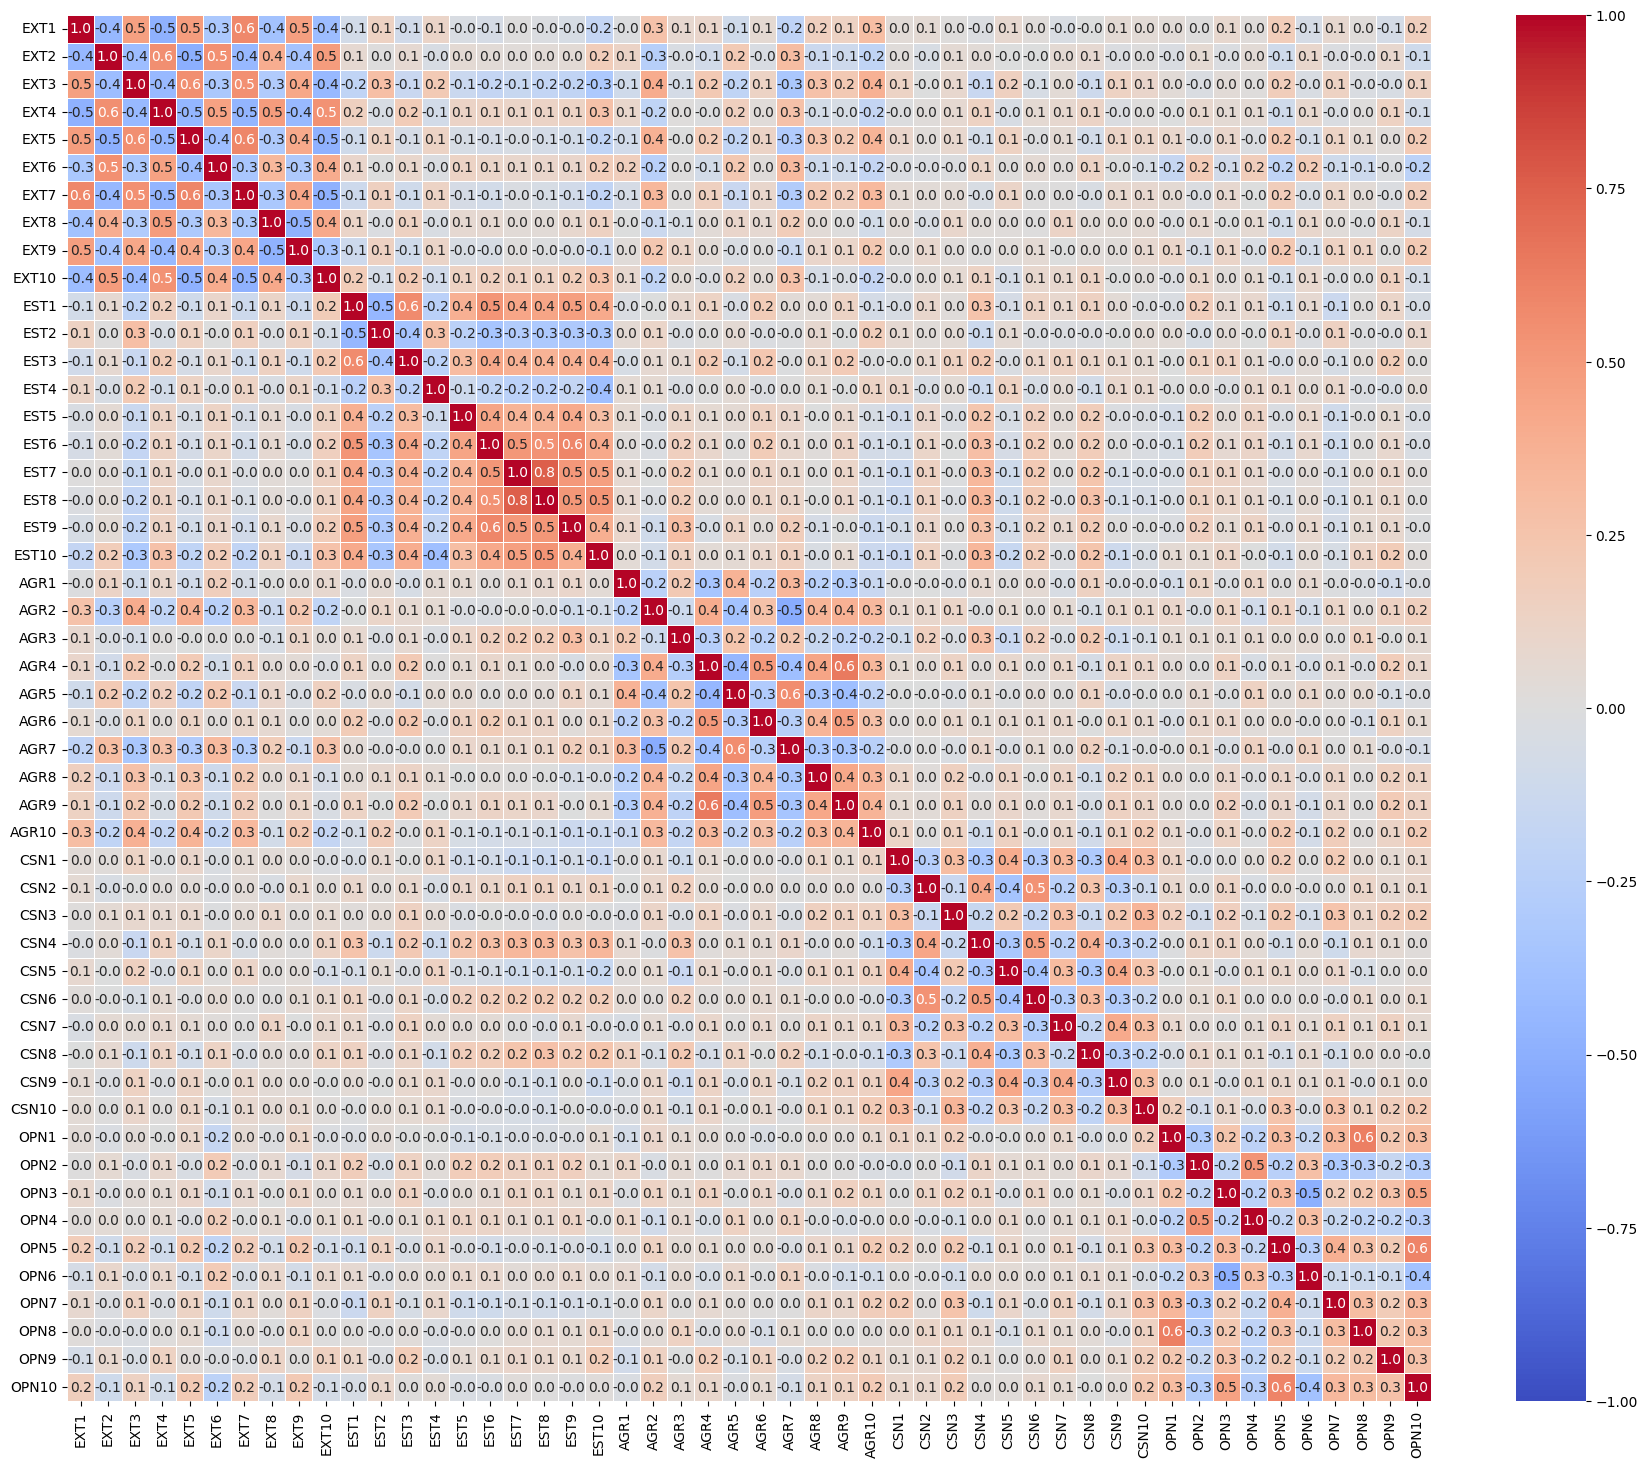

In [11]:
correlation_matrix = df_answers.corr()

plt.figure(figsize=(22, 18))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    vmin=-1, vmax=1, center=0,
    linewidths=0.5
)

**Mamy dataset - bedziemy bazowac na odpowiedziach by przydzielic ludzi do typow charakterow**


In [12]:
from scipy.stats import zscore


z_scores = df_answers.apply(zscore)


outliers_z = (z_scores.abs() > 5)

outliers_per_column = outliers_z.sum()


total_outliers = outliers_z.sum().sum()

print("Liczba wartości odstających w każdej kolumnie:")
print(outliers_per_column)

print("\nCałkowita liczba wartości odstających w całym zbiorze danych:")
print(total_outliers)
print("\nTotal rows:")
print(len(df_answers))

Liczba wartości odstających w każdej kolumnie:
EXT1     0
EXT2     0
EXT3     0
EXT4     0
EXT5     0
EXT6     0
EXT7     0
EXT8     0
EXT9     0
EXT10    0
EST1     0
EST2     0
EST3     0
EST4     0
EST5     0
EST6     0
EST7     0
EST8     0
EST9     0
EST10    0
AGR1     0
AGR2     0
AGR3     0
AGR4     0
AGR5     0
AGR6     0
AGR7     0
AGR8     0
AGR9     0
AGR10    0
CSN1     0
CSN2     0
CSN3     0
CSN4     0
CSN5     0
CSN6     0
CSN7     0
CSN8     0
CSN9     0
CSN10    0
OPN1     0
OPN2     0
OPN3     0
OPN4     0
OPN5     0
OPN6     0
OPN7     0
OPN8     0
OPN9     0
OPN10    0
dtype: int64

Całkowita liczba wartości odstających w całym zbiorze danych:
0

Total rows:
1013558


Brak wartości odstajacych - check ze względu na znajomosc przedziałów (zawsze powinno być pomiędzy 1-5)

In [13]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 5.6 MB/s eta 0:00:00


In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
import optuna
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler
"""
scaler = MinMaxScaler()

scaled_features = df_answers.sample(frac=0.8, random_state=42)
scaled_features = scaler.fit_transform(scaled_features)

scaled_features_all = scaler.fit_transform(df_answers)
"""


scaler = StandardScaler()

scaled_features = df_answers.copy()
scaled_features = scaler.fit_transform(scaled_features)
scaled_features_all = scaler.fit_transform(df_answers)


def objective(trial):
    # Hiperparametry do optymalizacji optuna
    k = trial.suggest_int('n_clusters', 4, 6)
    init_method = trial.suggest_categorical('init', ['k-means++', 'random'])
    max_iter = trial.suggest_int('max_iter', 100, 1500, step=100)
    n_init = trial.suggest_int('n_init', 5, 40, step=5)
    batch_size = trial.suggest_int('batch_size', 500, 10000, step=500)

    kmeans = MiniBatchKMeans(
    n_clusters=k,
    init=init_method,
    max_iter=max_iter,
    n_init=n_init,
    random_state=42,
    batch_size=batch_size
    )

    """    kmeans = KMeans(
        n_clusters=4,  # CHce 4 bo sa 4 charaktery
        init=init_method,
        max_iter=max_iter,
        n_init=n_init,
        random_state=42
    )"""

    labels = kmeans.fit_predict(scaled_features)


    score =  calinski_harabasz_score(scaled_features, labels)
    return score  # Maksymalizujemy  score - calinski_harabasz_score -- stosunek między rozproszeniem międzyklastrowym a rozproszeniem wewnątrzklastrowym - performance

# Optymalizacja za pomocą Optuna
study = optuna.create_study(direction='maximize')  # Maksymalizujemy  score
study.optimize(objective, n_trials=20, n_jobs=-1)  # Liczba prób


print("Najlepsze parametry:", study.best_params)
print("Najlepszy Score:", study.best_value)

# Trening modelu z najlepszymi parametrami
best_params = study.best_params
final_kmeans = MiniBatchKMeans(
    n_clusters=best_params['n_clusters'],
    init=best_params['init'],
    max_iter=best_params['max_iter'],
    n_init=best_params['n_init'],
    batch_size=best_params['batch_size'],
    random_state=42

)

df_answers['persona_group'] = final_kmeans.fit_predict(scaled_features_all)

"""

#silhouette = silhouette_score(scaled_features, kmeans.labels_)
calinski = calinski_harabasz_score(scaled_features, kmeans.labels_)
davies = davies_bouldin_score(scaled_features, kmeans.labels_)

#print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Index: {calinski}")
print(f"Davies-Bouldin Index: {davies}")

df_answers = pd.concat([df_answers, df_country], axis = 1)

print("\nTotal rows:")
print(len(df_answers))

df_answers.info()"""

[I 2024-12-06 17:37:13,840] A new study created in memory with name: no-name-dcf8ee08-4137-4570-b248-ecdd3ed25ffc
[I 2024-12-06 17:37:20,078] Trial 1 finished with value: 63512.090166288035 and parameters: {'n_clusters': 4, 'init': 'random', 'max_iter': 600, 'n_init': 25, 'batch_size': 2000}. Best is trial 1 with value: 63512.090166288035.
[I 2024-12-06 17:37:22,947] Trial 0 finished with value: 66143.56523803218 and parameters: {'n_clusters': 4, 'init': 'random', 'max_iter': 1500, 'n_init': 25, 'batch_size': 9500}. Best is trial 0 with value: 66143.56523803218.
[I 2024-12-06 17:37:25,839] Trial 2 finished with value: 56839.30244587722 and parameters: {'n_clusters': 5, 'init': 'k-means++', 'max_iter': 1300, 'n_init': 10, 'batch_size': 1500}. Best is trial 0 with value: 66143.56523803218.
[I 2024-12-06 17:37:31,393] Trial 3 finished with value: 53706.632240929015 and parameters: {'n_clusters': 5, 'init': 'random', 'max_iter': 1400, 'n_init': 35, 'batch_size': 9500}. Best is trial 0 with

Najlepsze parametry: {'n_clusters': 4, 'init': 'random', 'max_iter': 1500, 'n_init': 25, 'batch_size': 9500}
Najlepszy Score: 66143.56523803218


'\n\n#silhouette = silhouette_score(scaled_features, kmeans.labels_)\ncalinski = calinski_harabasz_score(scaled_features, kmeans.labels_)\ndavies = davies_bouldin_score(scaled_features, kmeans.labels_)\n\n#print(f"Silhouette Score: {silhouette}")\nprint(f"Calinski-Harabasz Index: {calinski}")\nprint(f"Davies-Bouldin Index: {davies}")\n\ndf_answers = pd.concat([df_answers, df_country], axis = 1)\n\nprint("\nTotal rows:")\nprint(len(df_answers))\n\ndf_answers.info()'

In [15]:
df_answers = pd.concat([df_answers, df_country], axis = 1)

ext_pos = ['EXT1','EXT3','EXT5','EXT7','EXT9']
ext_neg = ['EXT2','EXT4','EXT6','EXT8','EXT10']
opn_pos = ['OPN1','OPN3','OPN5','OPN7','OPN8','OPN9','OPN10']
opn_neg = ['OPN2','OPN4','OPN6']
agr_pos = ['AGR2','AGR4','AGR6','AGR8','AGR10','AGR9']
agr_neg = ['AGR1','AGR3','AGR5','AGR7']
csn_pos = ['CSN1','CSN3','CSN5','CSN7','CSN9','CSN10']
csn_neg = ['CSN2','CSN4','CSN6','CSN8']
nrt_pos = ['EST1','EST3','EST5','EST6','EST7','EST8','EST9','EST10']
nrt_neg = ['EST2','EST4']

df_answers['extroversion_positve'] = df_answers[ext_pos].sum(axis=1)
df_answers['extroversion_negative'] = df_answers[ext_neg].sum(axis=1)
df_answers['openness_positve'] = df_answers[opn_pos].sum(axis=1)
df_answers['openness_negative'] = df_answers[opn_neg].sum(axis=1)
df_answers['agreeable_positve'] = df_answers[agr_pos].sum(axis=1)
df_answers['agreeable_negative'] = df_answers[agr_neg].sum(axis=1)
df_answers['conscientious_positve'] = df_answers[csn_pos].sum(axis=1)
df_answers['conscientious_negative'] = df_answers[csn_neg].sum(axis=1)
df_answers['neurotic_positve'] = df_answers[nrt_pos].sum(axis=1)
df_answers['neurotic_negative'] = df_answers[nrt_neg].sum(axis=1)

df_answers['extroversion'] = df_answers['extroversion_positve'] - df_answers['extroversion_negative']
df_answers['openness'] = df_answers['openness_positve'] - df_answers['openness_negative']
df_answers['agreeable'] = df_answers['agreeable_positve'] - df_answers['agreeable_negative']
df_answers['conscientious'] = df_answers['conscientious_positve'] - df_answers['conscientious_negative']
df_answers['neurotic'] = df_answers['neurotic_positve'] - df_answers['neurotic_negative']


df_personas = df_answers.iloc[:, 50:]
df_personas.describe().T

count       mean       std   min   25%   50%  \
persona_group           1013558.0   1.317908  1.087977   0.0   0.0   1.0   
extroversion_positve    1013558.0  14.948858  5.025735   0.0  11.0  15.0   
extroversion_negative   1013558.0  15.286097  4.806087   0.0  12.0  15.0   
openness_positve        1013558.0  26.687873  4.877010   0.0  24.0  27.0   
openness_negative       1013558.0   5.970430  2.510556   0.0   4.0   6.0   
agreeable_positve       1013558.0  22.572532  4.806000   0.0  20.0  23.0   
agreeable_negative      1013558.0   8.981937  3.435929   0.0   6.0   9.0   
conscientious_positve   1013558.0  20.388589  4.616050   0.0  17.0  21.0   
conscientious_negative  1013558.0  10.845289  3.877807   0.0   8.0  11.0   
neurotic_positve        1013558.0  24.412568  7.472230   0.0  19.0  25.0   
neurotic_negative       1013558.0   5.828828  1.981360   0.0   4.0   6.0   
extroversion            1013558.0  -0.337239  9.044663 -25.0  -7.0   0.0   
openness                1013558.0  20.717443  6.459119  -9.0  16.0  21.0   
agreeable               1013558.0  13.590595  7.322929 -16.0   9.0  14.0   
conscientious           1013558.0   9.543300  7.371143 -18.0   4.0  10.0   
neurotic                1013558.0  18.583741  8.612919  -8.0  12.0  19.0   

                         75%   max  
persona_group            2.0   3.0  
extroversion_positve    19.0  25.0  
extroversion_negative   19.0  25.0  
openness_positve        30.0  35.0  
openness_negative        8.0  15.0  
agreeable_positve       26.0  30.0  
agreeable_negative      11.0  20.0  
conscientious_positve   24.0  30.0  
conscientious_negative  14.0  20.0  
neurotic_positve        30.0  40.0  
neurotic_negative        7.0  10.0  
extroversion             6.0  25.0  
openness                26.0  35.0  
agreeable               19.0  28.0  
conscientious           15.0  28.0  
neurotic                25.0  40.0

In [16]:
df_personas.head()

persona_group country lat_appx_lots_of_err long_appx_lots_of_err  \
0              2      GB              51.5448                0.1991   
1              0      MY               3.1698               101.706   
2              2      GB              54.9119               -1.3833   
3              0      GB                51.75                 -1.25   
4              2      KE                  1.0                  38.0   

   extroversion_positve  extroversion_negative  openness_positve  \
0                  23.0                    7.0              30.0   
1                  12.0                   22.0              22.0   
2                  12.0                   17.0              27.0   
3                  11.0                   15.0              26.0   
4                  17.0                   18.0              33.0   

   openness_negative  agreeable_positve  agreeable_negative  \
0                3.0               23.0                 8.0   
1                5.0               26.0                 6.0   
2                4.0               23.0                 5.0   
3                5.0               23.0                 9.0   
4                3.0               26.0                 4.0   

   conscientious_positve  conscientious_negative  neurotic_positve  \
0                   20.0                    12.0              18.0   
1                   22.0                     9.0              17.0   
2                   19.0                     9.0              20.0   
3                   14.0                    13.0              22.0   
4                   28.0                     4.0              15.0   

   neurotic_negative  extroversion  openness  agreeable  conscientious  \
0                6.0          16.0      27.0       15.0            8.0   
1                4.0         -10.0      17.0       20.0           13.0   
2                6.0          -5.0      23.0       18.0           10.0   
3                5.0          -4.0      21.0       14.0            1.0   
4                8.0          -1.0      30.0       22.0           24.0   

   neurotic  
0      12.0  
1      13.0  
2      14.0  
3      17.0  
4       7.0

In [17]:
traits_columns = ['extroversion', 'openness', 'agreeable', 'conscientious', 'neurotic']
positive_negative_columns = ['extroversion_positve', 'openness_positve', 'agreeable_positve',
                           'conscientious_positve', 'neurotic_positve','extroversion_negative', 'openness_negative', 'agreeable_negative',
                           'conscientious_negative', 'neurotic_negative']
positive_traits_columns = ['extroversion_positve', 'openness_positve', 'agreeable_positve',
                           'conscientious_positve', 'neurotic_positve']
negative_traits_columns = ['extroversion_negative', 'openness_negative', 'agreeable_negative',
                           'conscientious_negative', 'neurotic_negative']

In [18]:
df_answers.head(50)


df_sample = df_answers.sample(frac=1, random_state=42)


df_sample = df_sample.reset_index(drop=True)

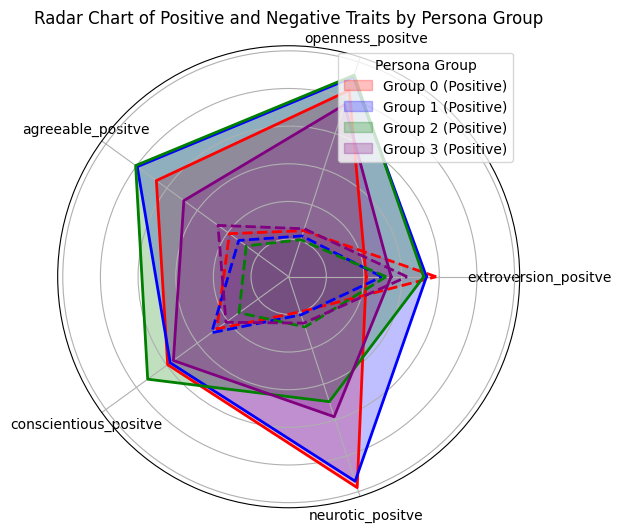

In [19]:

positive_group_means = df_sample.groupby('persona_group')[positive_traits_columns].mean()
negative_group_means = df_sample.groupby('persona_group')[negative_traits_columns].mean()

traits_labels = positive_traits_columns
num_vars = len(traits_labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]


fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))


colors = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'cyan']


for i, group in enumerate(positive_group_means.index):

    positive_values = positive_group_means.loc[group].tolist()
    positive_values += positive_values[:1]
    ax.fill(angles, positive_values, color=colors[i], alpha=0.25, label=f'Group {group} (Positive)')
    ax.plot(angles, positive_values, color=colors[i], linewidth=2)


    negative_values = negative_group_means.loc[group].tolist()
    negative_values += negative_values[:1]
    ax.fill(angles, negative_values, color=colors[i], alpha=0.1)
    ax.plot(angles, negative_values, color=colors[i], linewidth=2, linestyle='dashed')


ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(traits_labels)
ax.legend(title='Persona Group', loc='upper right')

plt.title('Radar Chart of Positive and Negative Traits by Persona Group')
plt.show()

               extroversion   openness  agreeable  conscientious   neurotic
persona_group                                                              
0                 -9.299428  19.604655  11.989269       8.067274  24.541453
1                  5.939415  22.195252  16.660200       6.793076  23.238048
2                  4.989295  22.985216  18.153863      15.001684  10.430193
3                 -2.125906  17.326986   5.596841       8.636591  13.072744
extroversion     -0.337239
openness         20.717443
agreeable        13.590595
conscientious     9.543300
neurotic         18.583741
dtype: float64


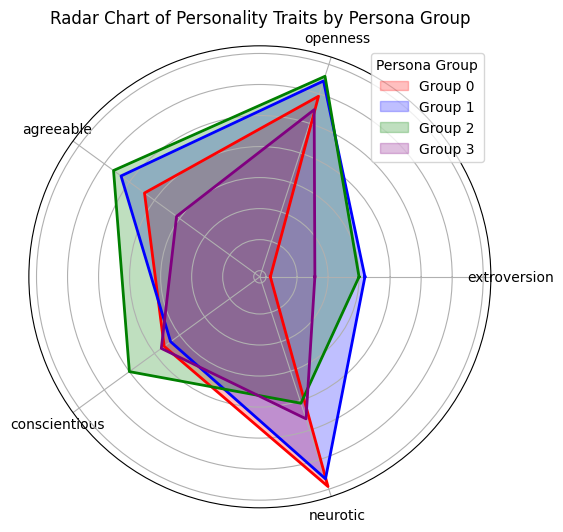

In [20]:

group_means = df_sample.groupby('persona_group')[traits_columns].mean()


traits_labels = traits_columns
num_vars = len(traits_labels)


angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]


fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))


colors = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'cyan']


for i, group in enumerate(group_means.index):

    values = group_means.loc[group].tolist()
    values += values[:1]
    ax.fill(angles, values, color=colors[i], alpha=0.25, label=f'Group {group}')
    ax.plot(angles, values, color=colors[i], linewidth=2)

print(group_means)
print(df_sample[traits_columns].mean())

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(traits_labels)
ax.legend(title='Persona Group', loc='upper right')

plt.title('Radar Chart of Personality Traits by Persona Group')
plt.show()

**Klasyfikacja Hipokratesa-Galena (Typy temperamentu)**

-- ***Melancholik:*** niska ekstrawersja, wysoka neurotyczność, wysoka sumienność, wysoka otwartość (refleksyjność, zainteresowanie abstrakcyjnymi ideami)

--***Flegmatyk:*** niska neurotyczność, wysoka ugodowość, niska otwartość (przywiązanie do rutyny i stabilność emocjonalna)


--***Sangwinik:***  wysoka ekstrawersja, niska neurotyczność, otwartość średnia lub wysoka (wskazuje na kreatywność i towarzyskość)

--***Choleryk:*** wysoka ekstrawersja, wysoka neurotyczność, niska ugodowość, średnia lub wysoka otwartość (odwaga w podejmowaniu ryzykownych decyzji)




In [21]:
from scipy.spatial.distance import euclidean


group_means = df_answers.groupby('persona_group')[traits_columns].mean()

character_traits = {
    "Melancholik": [0.2, 0.8, 0.6, 0.3, 0.8],  # [extroversion, openness, agreeable, conscientious, neurotic]
    "Flegmatyk": [0.2, 0.2, 0.8, 0.6, 0.2],
    "Sangwinik": [0.8, 0.6, 0.5, 0.6, 0.2],
    "Choleryk": [0.7, 0.5, 0.2, 0.2, 0.8]
}

normalized_means = (group_means - group_means.min()) / (group_means.max() - group_means.min())

mapping = {}
used_types = set()

for cluster, mean_values in normalized_means.iterrows():
    distances = {char: euclidean(mean_values, traits) for char, traits in character_traits.items() if char not in used_types}
    best_match = min(distances, key=distances.get)
    mapping[cluster] = best_match
    used_types.add(best_match)
### Oblicza odleglosc miedzy dwoma array i dopasowywuje najlepsza opcje

print("Przypisania grup do typów charakteru:", mapping)

df_answers['persona_group_desc'] = df_answers['persona_group'].map(mapping)



print(group_means)
print(df_answers['persona_group_desc'].value_counts())
print(df_answers['persona_group'].value_counts())



Przypisania grup do typów charakteru: {0: 'Melancholik', 1: 'Choleryk', 2: 'Sangwinik', 3: 'Flegmatyk'}
               extroversion   openness  agreeable  conscientious   neurotic
persona_group                                                              
0                 -9.299428  19.604655  11.989269       8.067274  24.541453
1                  5.939415  22.195252  16.660200       6.793076  23.238048
2                  4.989295  22.985216  18.153863      15.001684  10.430193
3                 -2.125906  17.326986   5.596841       8.636591  13.072744
persona_group_desc
Melancholik    302761
Choleryk       273037
Sangwinik      250541
Flegmatyk      187219
Name: count, dtype: int64
persona_group
0    302761
1    273037
2    250541
3    187219
Name: count, dtype: int64


In [22]:
# Grupowanie danych według 'persona_group', 'lat_appx_lots_of_err', 'long_appx_lots_of_err'
group_counts = df_answers.groupby(['persona_group_desc', 'lat_appx_lots_of_err', 'long_appx_lots_of_err']).size().reset_index(name='count')
group_counts['lat_appx_lots_of_err'] = pd.to_numeric(group_counts['lat_appx_lots_of_err'], errors='coerce')
group_counts['long_appx_lots_of_err'] = pd.to_numeric(group_counts['long_appx_lots_of_err'], errors='coerce')
group_counts = group_counts.dropna()
group_counts.sort_values('count',ascending=0).head(25)

persona_group_desc  lat_appx_lots_of_err  long_appx_lots_of_err  count
53700        Melancholik               38.0000               -97.0000  37070
79380          Sangwinik               38.0000               -97.0000  34128
7934            Choleryk               38.0000               -97.0000  34117
30991          Flegmatyk               38.0000               -97.0000  20654
67230        Melancholik               51.5000                -0.1300   7989
19985           Choleryk               51.5000                -0.1300   7784
45283        Melancholik              -27.0000               133.0000   5564
90975          Sangwinik               51.5000                -0.1300   5377
237             Choleryk              -27.0000               133.0000   5310
71793          Sangwinik              -27.0000               133.0000   4878
41452          Flegmatyk               51.5000                -0.1300   4753
47007        Melancholik               14.5833               120.9667   4502
24013          Flegmatyk              -27.0000               133.0000   3395
61167        Melancholik               43.6425               -79.3872   3300
25392          Flegmatyk               14.5833               120.9667   3109
14847           Choleryk               43.6425               -79.3872   3094
1806            Choleryk               14.5833               120.9667   3065
86312          Sangwinik               43.6425               -79.3872   2698
73258          Sangwinik               14.5833               120.9667   2228
46739        Melancholik                1.2931               103.8558   2108
62484        Melancholik               45.3155               -75.8370   2059
47322        Melancholik               20.0000                77.0000   2022
2075            Choleryk               20.0000                77.0000   1949
37011          Flegmatyk               43.6425               -79.3872   1936
73494          Sangwinik               20.0000                77.0000   1889

In [23]:
import plotly.express as px


persona_groups = group_counts['persona_group_desc'].unique()


for group in persona_groups:
    group_data = group_counts[group_counts['persona_group_desc'] == group]

    fig = px.scatter_geo(
        group_data,
        lat='lat_appx_lots_of_err',
        lon='long_appx_lots_of_err',
        size='count',
        title=f"Persona Group {group} on Map",
        labels={'persona_group_desc': 'Persona Group'},
        projection="natural earth"
    )


    fig.update_traces(marker=dict(opacity=0.6, line=dict(width=1, color='DarkSlateGrey')))
    fig.update_layout(
        geo=dict(showland=True, landcolor="LightGrey", showcountries=True, countrycolor="White")
    )

    fig.show()


Bazujac na danych widzimy że duża cześć współrzędnych geograficznych jest podana jako generalne krajowe, wynika to z braku zezwolen na pobieranie danych o lokalizacji, lub innych czynnikach.
Planowana analiza po lokalizacji i przypisaniu ich do miast poprzez model **Nearest Neighbors** jest niewykonalna.

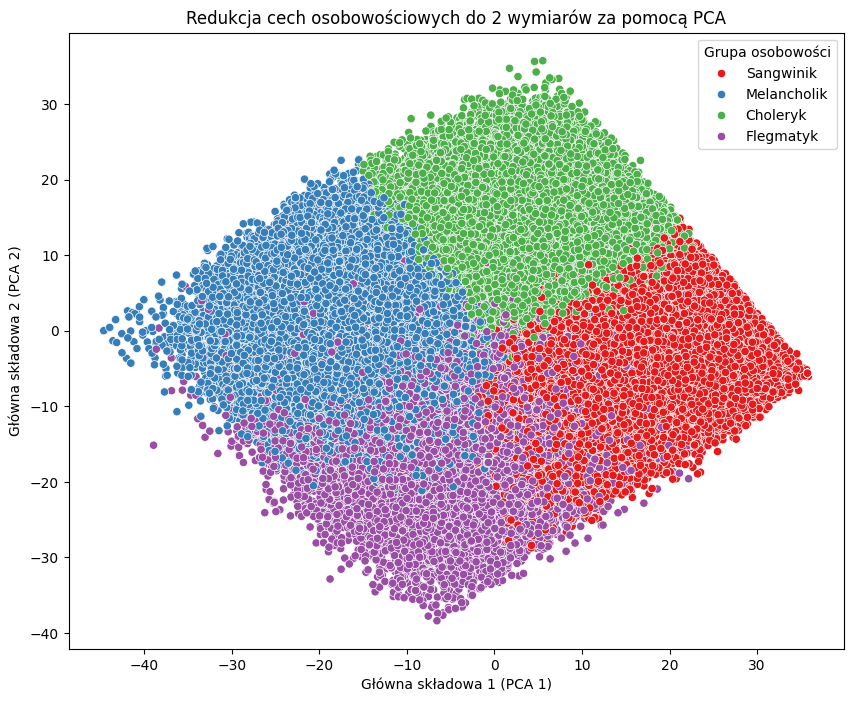

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


traits_columns = ['extroversion', 'openness', 'agreeable', 'conscientious', 'neurotic']
traits = df_answers[traits_columns]


pca = PCA(n_components=2)
pca_result = pca.fit_transform(traits)
df_answers['pca_one'] = pca_result[:, 0]
df_answers['pca_two'] = pca_result[:, 1]


plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca_one', y='pca_two', hue='persona_group_desc', data=df_answers, palette='Set1')
plt.title('Redukcja cech osobowościowych do 2 wymiarów za pomocą PCA')
plt.xlabel('Główna składowa 1 (PCA 1)')
plt.ylabel('Główna składowa 2 (PCA 2)')
plt.legend(title='Grupa osobowości')
plt.show()


In [25]:
import kagglehub


path_city = kagglehub.dataset_download("hansukyang/temperature-history-of-1000-cities-1980-to-2020")

print("Path to dataset files:", path_city)

100%|██████████| 29.8M/29.8M [00:00<00:00, 61.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/hansukyang/temperature-history-of-1000-cities-1980-to-2020/versions/1


In [26]:

dataset_path_city = os.path.join(path_city,'daily_temperature_1000_cities_1980_2020.csv')
df_city = pd.read_csv(dataset_path_city)#, delimiter="\t")
df_city = pd.DataFrame(df_city)
print(len(df_city))
avg_row = df_city.iloc[12:, 1:].astype(float).mean()
df_city.loc['avg_tem'] =avg_row
df_part1 = df_city.iloc[:12, :]
df_part2 = df_city.iloc[-1:, :]
df_city = pd.concat([df_part1, df_part2], axis=0).T
df_city['avg_tem'] = df_city['avg_tem'].fillna('avg_tem')
df_city.columns = df_city.iloc[0]
df_city = df_city[1:]
df_city.head(10)

<ipython-input-26-714ae317b92b>:2: DtypeWarning:

Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,2

14896


Unnamed: 0         city   city_ascii       lat        lng        country iso2  \
0                 Tokyo        Tokyo    35.685   139.7514          Japan   JP   
1              New York     New York   40.6943   -73.9249  United States   US   
2           Mexico City  Mexico City   19.4424    -99.131         Mexico   MX   
3                Mumbai       Mumbai    19.017     72.857          India   IN   
4             São Paulo    Sao Paulo  -23.5587    -46.625         Brazil   BR   
5                 Delhi        Delhi     28.67      77.23          India   IN   
6              Shanghai     Shanghai   31.2165   121.4365          China   CN   
7               Kolkata      Kolkata    22.495    88.3247          India   IN   
8           Los Angeles  Los Angeles   34.1139  -118.4068  United States   US   
9                 Dhaka        Dhaka   23.7231    90.4086     Bangladesh   BD   

Unnamed: 0 iso3        admin_name  capital  population          id datetime  \
0           JPN             Tōkyō  primary  35676000.0  1392685764        0   
1           USA          New York      NaN  19354922.0  1840034016        1   
2           MEX  Ciudad de México  primary  19028000.0  1484247881        2   
3           IND       Mahārāshtra    admin  18978000.0  1356226629        3   
4           BRA         São Paulo    admin  18845000.0  1076532519        4   
5           IND             Delhi    admin  15926000.0  1356872604        5   
6           CHN          Shanghai    admin  14987000.0  1156073548        6   
7           IND       West Bengal    admin  14787000.0  1356060520        7   
8           USA        California      NaN  12815475.0  1840020491        8   
9           BGD             Dhaka  primary  12797394.0  1050529279        9   

Unnamed: 0    avg_tem  
0           15.748201  
1           12.402294  
2           14.985392  
3           26.548575  
4           19.806856  
5           24.774463  
6           16.816658  
7           26.238726  
8           17.219675  
9           25.615314

Dataset przygotowany dla analizay per city łaczony po modelu Nearest Neighbors

Generalnie można pominąć ale został już przygotowany to został :)

In [60]:
import kagglehub

# Download latest version
world_path = kagglehub.dataset_download("nelgiriyewithana/countries-of-the-world-2023")

print("Path to dataset files:", world_path)

dataset_world_path = os.path.join(world_path,'world-data-2023.csv')
df_world = pd.read_csv(dataset_world_path) #, delimiter="\t")
df_world = pd.DataFrame(df_world)

print(df_world.head(2).T)
world_columns = ['Country','Density\n(P/Km2)', 'Abbreviation','Agricultural Land( %)', 'Birth Rate', 'Co2-Emissions', 'CPI', 'Forested Area (%)', 'GDP', 'Physicians per thousand', 'Infant mortality', 'Life expectancy', 'Population', 'Population: Labor force participation (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population']  #, 'Fertility Rate'
#df_world = df_world[world_columns]
df_world.head(25)

Path to dataset files: /root/.cache/kagglehub/datasets/nelgiriyewithana/countries-of-the-world-2023/versions/1
                                                          0                 1
Country                                         Afghanistan           Albania
Density\n(P/Km2)                                         60               105
Abbreviation                                             AF                AL
Agricultural Land( %)                                58.10%            43.10%
Land Area(Km2)                                      652,230            28,748
Armed Forces size                                   323,000             9,000
Birth Rate                                            32.49             11.78
Calling Code                                           93.0             355.0
Capital/Major City                                    Kabul            Tirana
Co2-Emissions                                         8,672             4,536
CPI                            

Country Density\n(P/Km2) Abbreviation  \
0              Afghanistan               60           AF   
1                  Albania              105           AL   
2                  Algeria               18           DZ   
3                  Andorra              164           AD   
4                   Angola               26           AO   
5      Antigua and Barbuda              223           AG   
6                Argentina               17           AR   
7                  Armenia              104           AM   
8                Australia                3           AU   
9                  Austria              109           AT   
10              Azerbaijan              123           AZ   
11             The Bahamas               39           BS   
12                 Bahrain            2,239           BH   
13              Bangladesh            1,265           BD   
14                Barbados              668           BB   
15                 Belarus               47           BY   
16                 Belgium              383           BE   
17                  Belize               17           BZ   
18                   Benin              108           BJ   
19                  Bhutan               20           BT   
20                 Bolivia               11           BO   
21  Bosnia and Herzegovina               64           BA   
22                Botswana                4           BW   
23                  Brazil               25           BR   
24                  Brunei               83           BN   

   Agricultural Land( %) Land Area(Km2) Armed Forces size  Birth Rate  \
0                 58.10%        652,230           323,000       32.49   
1                 43.10%         28,748             9,000       11.78   
2                 17.40%      2,381,741           317,000       24.28   
3                 40.00%            468               NaN        7.20   
4                 47.50%      1,246,700           117,000       40.73   
5                 20.50%            443                 0       15.33   
6                 54.30%      2,780,400           105,000       17.02   
7                 58.90%         29,743            49,000       13.99   
8                 48.20%      7,741,220            58,000       12.60   
9                 32.40%         83,871            21,000        9.70   
10                57.70%         86,600            82,000       14.00   
11                 1.40%         13,880             1,000       13.97   
12                11.10%            765            19,000       13.99   
13                70.60%        148,460           221,000       18.18   
14                23.30%            430             1,000       10.65   
15                42.00%        207,600           155,000        9.90   
16                44.60%         30,528            32,000       10.30   
17                 7.00%         22,966             2,000       20.79   
18                33.30%        112,622            12,000       36.22   
19                13.60%         38,394             6,000       17.26   
20                34.80%      1,098,581            71,000       21.75   
21                43.10%         51,197            11,000        8.11   
22                45.60%        581,730             9,000       24.82   
23                33.90%      8,515,770           730,000       13.92   
24                 2.70%          5,765             8,000       14.90   

    Calling Code      Capital/Major City Co2-Emissions  ...  \
0           93.0                   Kabul         8,672  ...   
1          355.0                  Tirana         4,536  ...   
2          213.0                 Algiers       150,006  ...   
3          376.0        Andorra la Vella           469  ...   
4          244.0                  Luanda        34,693  ...   
5            1.0  St. John's, Saint John           557  ...   
6           54.0            Buenos Aires       201,348  ...   
7          374.0                 Yerevan         5,156 

In [61]:
import kagglehub

# Download latest version
path_happ = kagglehub.dataset_download("ajaypalsinghlo/world-happiness-report-2024")


dataset_path_happ = os.path.join(path_happ,'WHR2024.csv')
df_happ = pd.read_csv(dataset_path_happ) #, delimiter="\t")
df_happ = pd.DataFrame(df_happ)


happ_columns = ['Country name', 'Ladder score']
df_happ = df_happ[happ_columns]
df_happ.head(25)

Country name  Ladder score
0                Finland         7.741
1                Denmark         7.583
2                Iceland         7.525
3                 Sweden         7.344
4                 Israel         7.341
5            Netherlands         7.319
6                 Norway         7.302
7             Luxembourg         7.122
8            Switzerland         7.060
9              Australia         7.057
10           New Zealand         7.029
11            Costa Rica         6.955
12                Kuwait         6.951
13               Austria         6.905
14                Canada         6.900
15               Belgium         6.894
16               Ireland         6.838
17               Czechia         6.822
18             Lithuania         6.818
19        United Kingdom         6.749
20              Slovenia         6.743
21  United Arab Emirates         6.733
22         United States         6.725
23               Germany         6.719
24                Mexico         6.678

In [46]:
"""import kagglehub

# Download latest version
path_costs = kagglehub.dataset_download("myrios/cost-of-living-index-by-country-by-number-2024")

print("Path to dataset files:", path_costs)

dataset_path_costs = os.path.join(path_costs,'Cost_of_Living_Index_by_Country_2024.csv')
df_costs = pd.read_csv(dataset_path_costs) #, delimiter="\t")
df_costs = pd.DataFrame(df_costs)


#cost_columns = ['Country name', 'Ladder score']
df_costs = df_costs.drop(columns='Rank')
df_costs.head(25)"""

Path to dataset files: /root/.cache/kagglehub/datasets/myrios/cost-of-living-index-by-country-by-number-2024/versions/1


Country  Cost of Living Index  Rent Index  \
0         Switzerland                 101.1        46.5   
1             Bahamas                  85.0        36.7   
2             Iceland                  83.0        39.2   
3           Singapore                  76.7        67.2   
4            Barbados                  76.6        19.0   
5              Norway                  76.0        26.2   
6             Denmark                  72.3        26.4   
7   Hong Kong (China)                  70.8        59.4   
8       United States                  70.4        41.7   
9           Australia                  70.2        33.4   
10            Austria                  65.1        22.5   
11             Canada                  64.8        33.2   
12        New Zealand                  64.6        25.9   
13            Ireland                  64.4        42.3   
14             France                  63.7        21.0   
15        Puerto Rico                  63.3        19.5   
16            Finland                  63.2        19.7   
17        Netherlands                  63.1        33.5   
18             Israel                  62.7        27.1   
19         Luxembourg                  62.4        40.5   
20            Germany                  62.2        24.4   
21     United Kingdom                  62.0        31.1   
22            Belgium                  61.1        20.1   
23        South Korea                  60.1        16.0   
24             Sweden                  59.3        20.9   

    Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                             74.9            109.1                    97.0   
1                             61.8             81.6                    83.3   
2                             62.0             88.4                    86.8   
3                             72.1             74.6                    50.4   
4                             48.9             80.8                    69.4   
5                             52.1             79.0                    73.5   
6                             50.2             64.8                    81.3   
7                             65.3             84.6                    46.2   
8                             56.6             75.0                    67.2   
9                             52.5             77.3                    62.5   
10                            44.7             66.4                    59.3   
11                            49.6             71.2                    61.7   
12                            46.0             71.9                    57.1   
13                            53.8             59.3                    65.3   
14                            43.2             69.5                    56.3   
15                            42.3             64.1                    53.1   
16                            42.4             63.0                    63.6   
17                            48.9             59.9                    61.2   
18                            45.6             59.6                    68.0   
19                            51.9             64.1                    68.7   
20                            44.0             60.8                    52.8   
21                            47.1             56.9                    62.7   
22                            41.4             57.5                    66.0   
23                            38.9             81.4                    31.4   
24                            40.9             60.8                    54.7   

    Local Purchasing Power Index  
0                          158.7  
1                           54.6  
2                          120.3  
3                          111.1  
4                           43.5  
5                          114.7  
6                          127.2  
7                          109.3  
8                          142.3  
9                          127.4  
10                         102.4  
11  

In [97]:

world_happines = pd.merge(df_happ, df_world, left_on='Country name', right_on='Country', how='inner')
#world_happines = pd.merge(world_happines_2, df_costs, left_on='Country name', right_on='Country', how='inner')

personas_group_count = (
    df_answers.groupby(['country', 'persona_group_desc'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)
personas_group_count.columns.name = None

personas_group_count['group_sum'] = personas_group_count[['Choleryk','Flegmatyk','Melancholik','Sangwinik']].sum(axis=1)

for col in ['Choleryk','Flegmatyk','Melancholik','Sangwinik']:
    personas_group_count[f'%of_{col}'] = personas_group_count[col] / personas_group_count['group_sum']

personas_group_count = personas_group_count.drop(columns=['Choleryk','Flegmatyk','Melancholik','Sangwinik'])#,'group_sum'])

world_personas_happines = pd.merge(world_happines, personas_group_count, left_on='Abbreviation', right_on='country', how='inner')

#world_personas_happines = world_personas_happines.drop(columns=['Country_x','country','Country_y','Cost of Living Plus Rent Index'])
world_personas_happines = world_personas_happines.drop(columns=['Latitude', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)','country','Longitude','Country', 'Capital/Major City', 'Largest city', 'Tax revenue (%)', 'Minimum wage', 'Official language','Currency-Code'])


print(world_personas_happines.info())
world_personas_happines.head(2).T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country name                               130 non-null    object 
 1   Ladder score                               130 non-null    float64
 2   Density
(P/Km2)                            130 non-null    object 
 3   Abbreviation                               130 non-null    object 
 4   Agricultural Land( %)                      130 non-null    object 
 5   Land Area(Km2)                             130 non-null    object 
 6   Armed Forces size                          129 non-null    object 
 7   Birth Rate                                 130 non-null    float64
 8   Calling Code                               130 non-null    float64
 9   Co2-Emissions                              130 non-null    object 
 10  CPI                       

0  \
Country name                                         Finland   
Ladder score                                           7.741   
Density\n(P/Km2)                                          18   
Abbreviation                                              FI   
Agricultural Land( %)                                  7.50%   
Land Area(Km2)                                       338,145   
Armed Forces size                                     25,000   
Birth Rate                                               8.6   
Calling Code                                           358.0   
Co2-Emissions                                         45,871   
CPI                                                   112.33   
CPI Change (%)                                         1.00%   
Fertility Rate                                          1.41   
Forested Area (%)                                     73.10%   
Gasoline Price                                        $1.45    
GDP                                        $268,761,201,365    
Infant mortality                                         1.4   
Life expectancy                                         81.7   
Maternal mortality ratio                                 3.0   
Out of pocket health expenditure                      19.90%   
Physicians per thousand                                 3.81   
Population                                         5,520,314   
Population: Labor force participation (%)             59.10%   
Total tax rate                                        36.60%   
Unemployment rate                                      6.59%   
Urban_population                                   4,716,888   
group_sum                                               4338   
%of_Choleryk                                        0.245505   
%of_Flegmatyk                                       0.243661   
%of_Melancholik                                     0.350853   
%of_Sangwinik                                       0.159982   

                                                           1  
Country name                                         Denmark  
Ladder score                                           7.583  
Density\n(P/Km2)                                         137  
Abbreviation                                              DK  
Agricultural Land( %)                                 62.00%  
Land Area(Km2)                                        43,094  
Armed Forces size                                     15,000  
Birth Rate                                              10.6  
Calling Code                                            45.0  
Co2-Emissions                                         31,786  
CPI                                                   110.35  
CPI Change (%)                                         0.80%  
Fertility Rate                                          1.73  
Forested Area (%)                                     14.70%  
Gasoline Price                                        $1.55   
GDP                                        $348,078,018,464   
Infant mortality                                         3.6  
Life expectancy                                         81.0  
Maternal mortality ratio                                 4.0  
Out of pocket health expenditure                      13.70%  
Physicians per thousand                                 4.01  
Population                                         5,818,553  
Population: Labor force participation (%)             62.20%  
Total tax rate                                        23.80%  
Unemployment rate                                      4.91%  
Urban_population                                   5,119,978  
group_sum                                               5501  
%of_Choleryk                                        0.310671  
%of_Flegmatyk                                       0.188875  
%of_Melancholik                                     0.259226  
%of_Sangwinik                                       0.241

In [98]:
print(world_personas_happines[world_personas_happines['Country name'] == 'Venezuela'])

   Country name  Ladder score Density\n(P/Km2) Abbreviation  \
74    Venezuela         5.607               32           VE   

   Agricultural Land( %) Land Area(Km2) Armed Forces size  Birth Rate  \
74                24.50%        912,050           343,000       17.88   

    Calling Code Co2-Emissions  ...  Population  \
74          58.0       164,175  ...  28,515,829   

   Population: Labor force participation (%)  Total tax rate  \
74                                    59.70%          73.30%   

   Unemployment rate Urban_population group_sum  %of_Choleryk  %of_Flegmatyk  \
74             8.80%       25,162,368      1251      0.292566       0.207834   

    %of_Melancholik %of_Sangwinik  
74         0.334133      0.165468  

[1 rows x 31 columns]


In [99]:
def clean_all_columns_safe(df):
    for column in df.columns:
        try:

            if df[column].dtype == 'object' and df[column].str.contains('%').any():
                df[column] = df[column].replace('%', '', regex=True).astype(float)

            if df[column].dtype == 'object' and df[column].str.contains(r'\$').any():
                df[column] = df[column].replace({'\$': '', ',': ''}, regex=True).astype(float)

            if df[column].dtype == 'object' and df[column].str.contains(',').any():
                df[column] = df[column].replace(',', '', regex=True).astype(float)
        except Exception as e:
            print(f"Blad {e}")
    return df

world_personas_happines = clean_all_columns_safe(world_personas_happines)

print(world_personas_happines.isna().sum().sum())
print(world_personas_happines[world_personas_happines.isnull().any(axis=1)].T)   ## 1 wiersz drop bo malo i tak osob
#world_personas_happines = world_personas_happines.dropna(axis=0)
print(world_personas_happines.info())
num_col = world_personas_happines.select_dtypes(include=['number']).columns
world_personas_happines[num_col] = world_personas_happines[num_col].fillna(world_personas_happines[num_col].mean())

print(world_personas_happines.isna().sum().sum())

world_personas_happines.head(2).T

4
                                                     42            120
Country name                                  Uzbekistan       Comoros
Ladder score                                       6.195         3.566
Density\n(P/Km2)                                    79.0         467.0
Abbreviation                                          UZ            KM
Agricultural Land( %)                               62.9          71.5
Land Area(Km2)                                  447400.0        2235.0
Armed Forces size                                68000.0           NaN
Birth Rate                                          23.3         31.88
Calling Code                                       998.0         269.0
Co2-Emissions                                    91811.0         202.0
CPI                                                  NaN        103.62
CPI Change (%)                                       NaN          -4.3
Fertility Rate                                      2.42          4.21
Fore

0               1
Country name                                      Finland         Denmark
Ladder score                                        7.741           7.583
Density\n(P/Km2)                                     18.0           137.0
Abbreviation                                           FI              DK
Agricultural Land( %)                                 7.5            62.0
Land Area(Km2)                                   338145.0         43094.0
Armed Forces size                                 25000.0         15000.0
Birth Rate                                            8.6            10.6
Calling Code                                        358.0            45.0
Co2-Emissions                                     45871.0         31786.0
CPI                                                112.33          110.35
CPI Change (%)                                        1.0             0.8
Fertility Rate                                       1.41            1.73
Forested Area (%)                                    73.1            14.7
Gasoline Price                                       1.45            1.55
GDP                                        268761201365.0  348078018464.0
Infant mortality                                      1.4             3.6
Life expectancy                                      81.7            81.0
Maternal mortality ratio                              3.0             4.0
Out of pocket health expenditure                     19.9            13.7
Physicians per thousand                              3.81            4.01
Population                                      5520314.0       5818553.0
Population: Labor force participation (%)            59.1            62.2
Total tax rate                                       36.6            23.8
Unemployment rate                                    6.59            4.91
Urban_population                                4716888.0       5119978.0
group_sum                                            4338            5501
%of_Choleryk                                     0.245505        0.310671
%of_Flegmatyk                                    0.243661        0.188875
%of_Melancholik                                  0.350853        0.259226
%of_Sangwinik                                    0.159982        0.241229

In [89]:
"""world_personas_happines['Forested Area (%)'] = world_personas_happines['Forested Area (%)'].replace('%', '', regex=True).astype(float)
world_personas_happines['Total tax rate'] = world_personas_happines['Total tax rate'].replace('%', '', regex=True).astype(float)
world_personas_happines['Unemployment rate'] = world_personas_happines['Unemployment rate'].replace('%', '', regex=True).astype(float)
world_personas_happines['Agricultural Land( %)'] = world_personas_happines['Agricultural Land( %)'].replace('%', '', regex=True).astype(float)
world_personas_happines['Population: Labor force participation (%)'] = world_personas_happines['Population: Labor force participation (%)'].replace('%', '', regex=True).astype(float)

world_personas_happines['GDP'] = world_personas_happines['GDP'].replace({'\$': '', ',': ''}, regex=True).astype(float)
world_personas_happines['Population'] = world_personas_happines['Population'].replace(',', '', regex=True).astype(float)
world_personas_happines['Urban_population'] = world_personas_happines['Urban_population'].replace(',', '', regex=True).astype(float)
world_personas_happines['Co2-Emissions'] = world_personas_happines['Co2-Emissions'].replace(',', '', regex=True).astype(float)
world_personas_happines['CPI'] = world_personas_happines['CPI'].replace(',', '', regex=True).astype(float)


print(world_personas_happines.isna().sum().sum())
print(world_personas_happines[world_personas_happines.isnull().any(axis=1)])   ## 1 wiersz drop bo malo i tak osob
world_personas_happines = world_personas_happines.dropna(axis=0)

world_personas_happines.head(2).T"""


"world_personas_happines['Forested Area (%)'] = world_personas_happines['Forested Area (%)'].replace('%', '', regex=True).astype(float)\nworld_personas_happines['Total tax rate'] = world_personas_happines['Total tax rate'].replace('%', '', regex=True).astype(float)\nworld_personas_happines['Unemployment rate'] = world_personas_happines['Unemployment rate'].replace('%', '', regex=True).astype(float)\nworld_personas_happines['Agricultural Land( %)'] = world_personas_happines['Agricultural Land( %)'].replace('%', '', regex=True).astype(float)\nworld_personas_happines['Population: Labor force participation (%)'] = world_personas_happines['Population: Labor force participation (%)'].replace('%', '', regex=True).astype(float)\n\nworld_personas_happines['GDP'] = world_personas_happines['GDP'].replace({'\\$': '', ',': ''}, regex=True).astype(float)\nworld_personas_happines['Population'] = world_personas_happines['Population'].replace(',', '', regex=True).astype(float)\nworld_personas_happines[

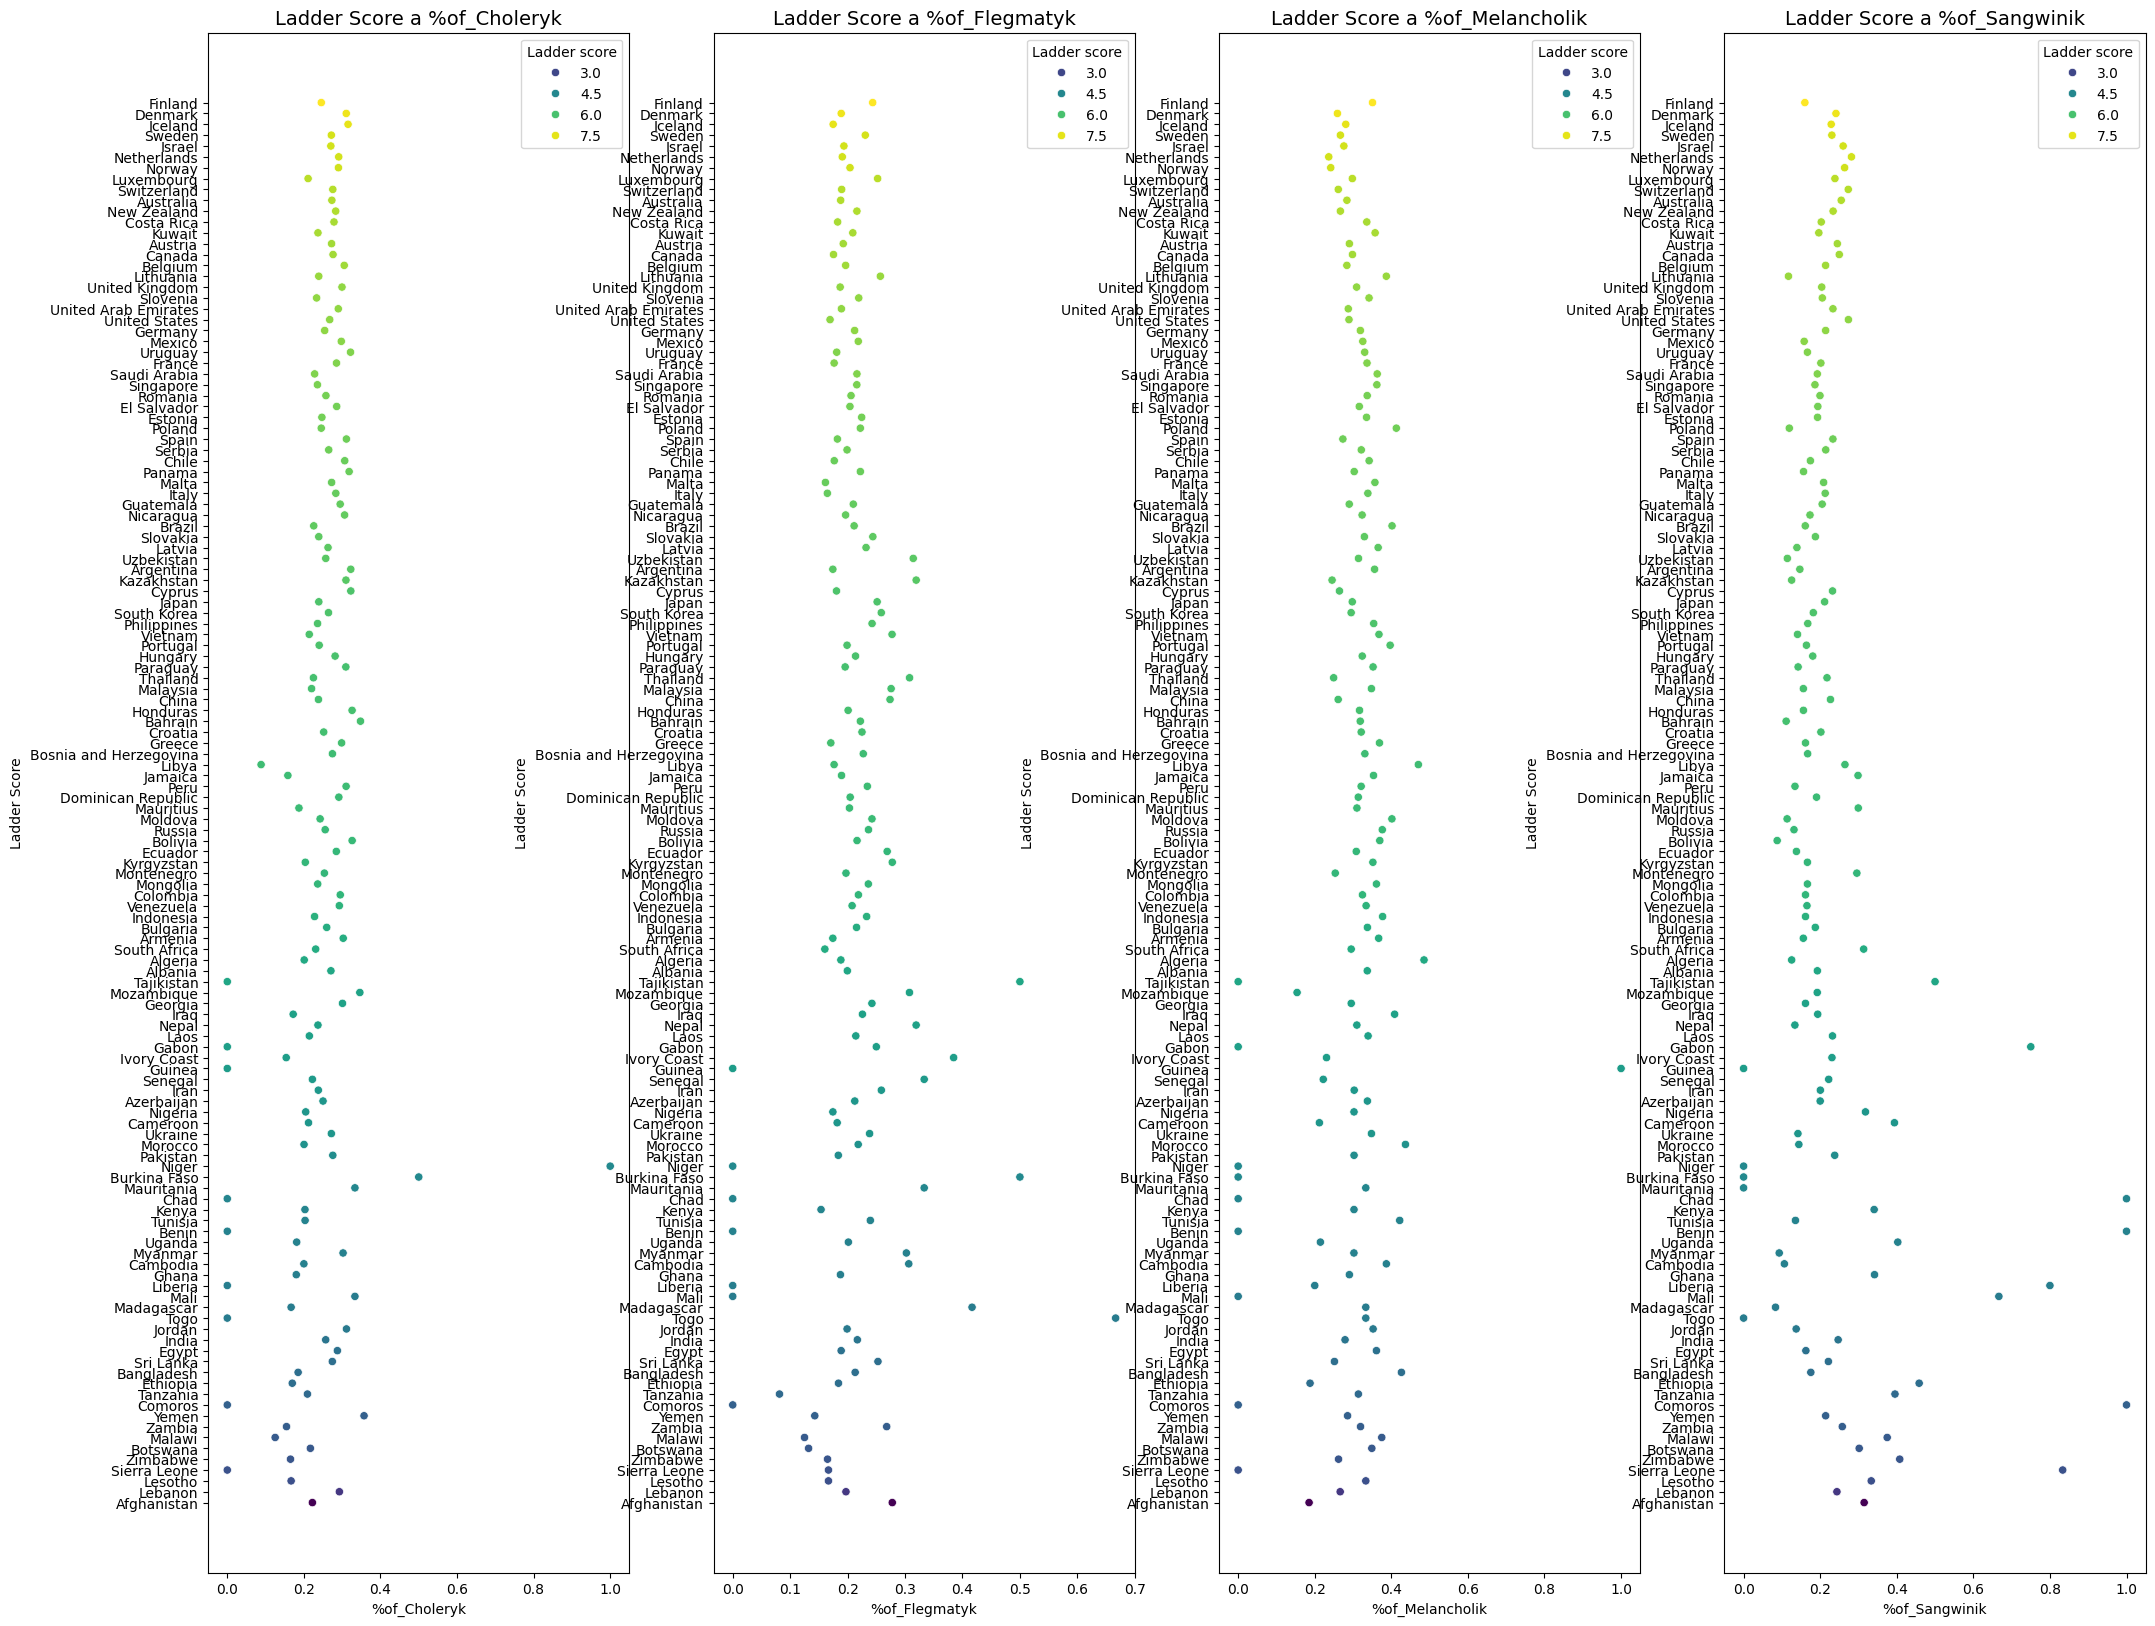

In [100]:
traits_columns2 = ['%of_Choleryk', '%of_Flegmatyk', '%of_Melancholik', '%of_Sangwinik']

fig, axs = plt.subplots(1, 4, figsize=(25,20))

for ax, trait in zip(axs.flat, traits_columns2):
    sns.scatterplot(data=world_personas_happines, x=trait, y='Country name', hue=world_personas_happines['Ladder score'], palette='viridis', ax=ax)##, legend=False)
    ax.set_title(f"Ladder Score a {trait}", fontsize=14)
    ax.set_xlabel(trait)
    ax.set_ylabel("Ladder Score")
plt.show()

<Axes: >

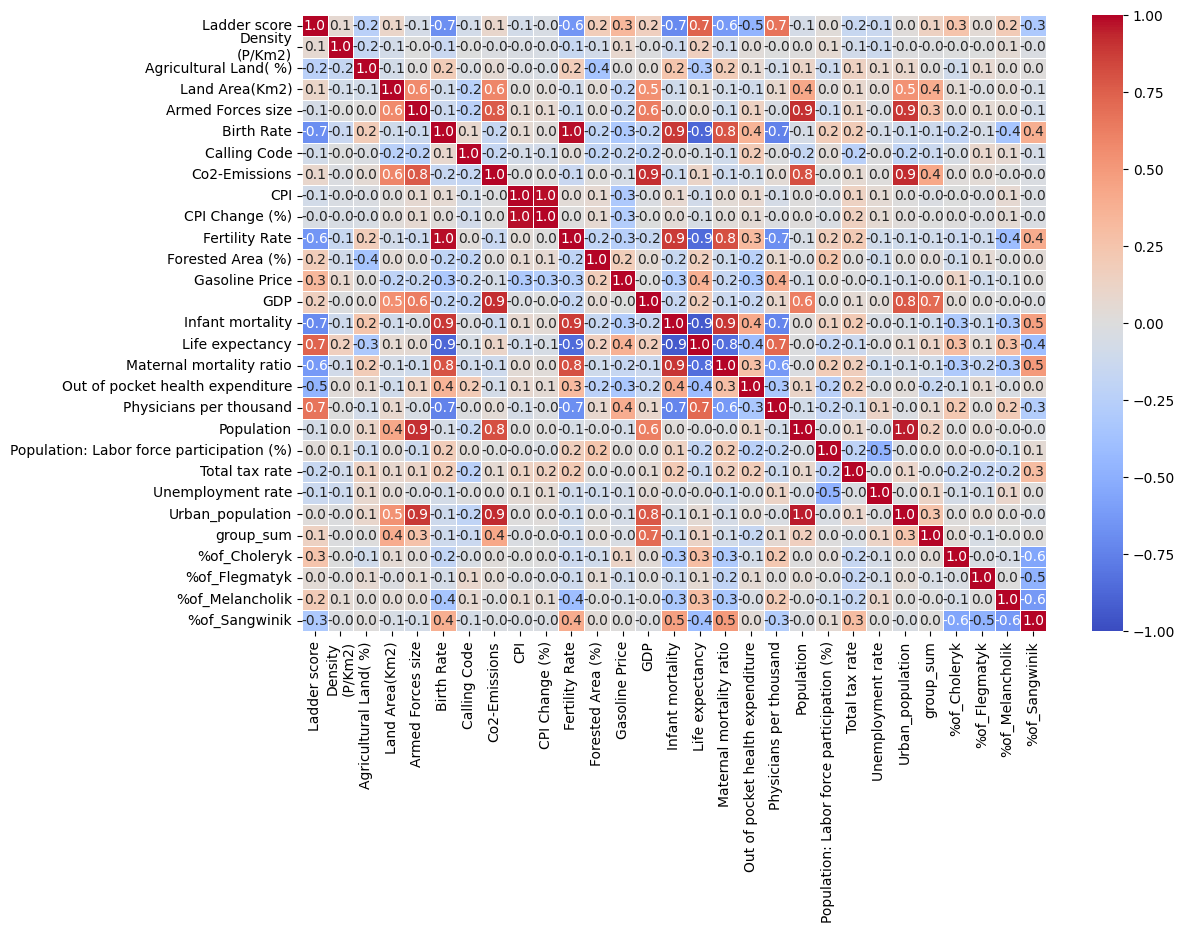

In [101]:

correlation = world_personas_happines.corr(numeric_only=True) #.sort_values(ascending=False) #['Ladder score']
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5
)


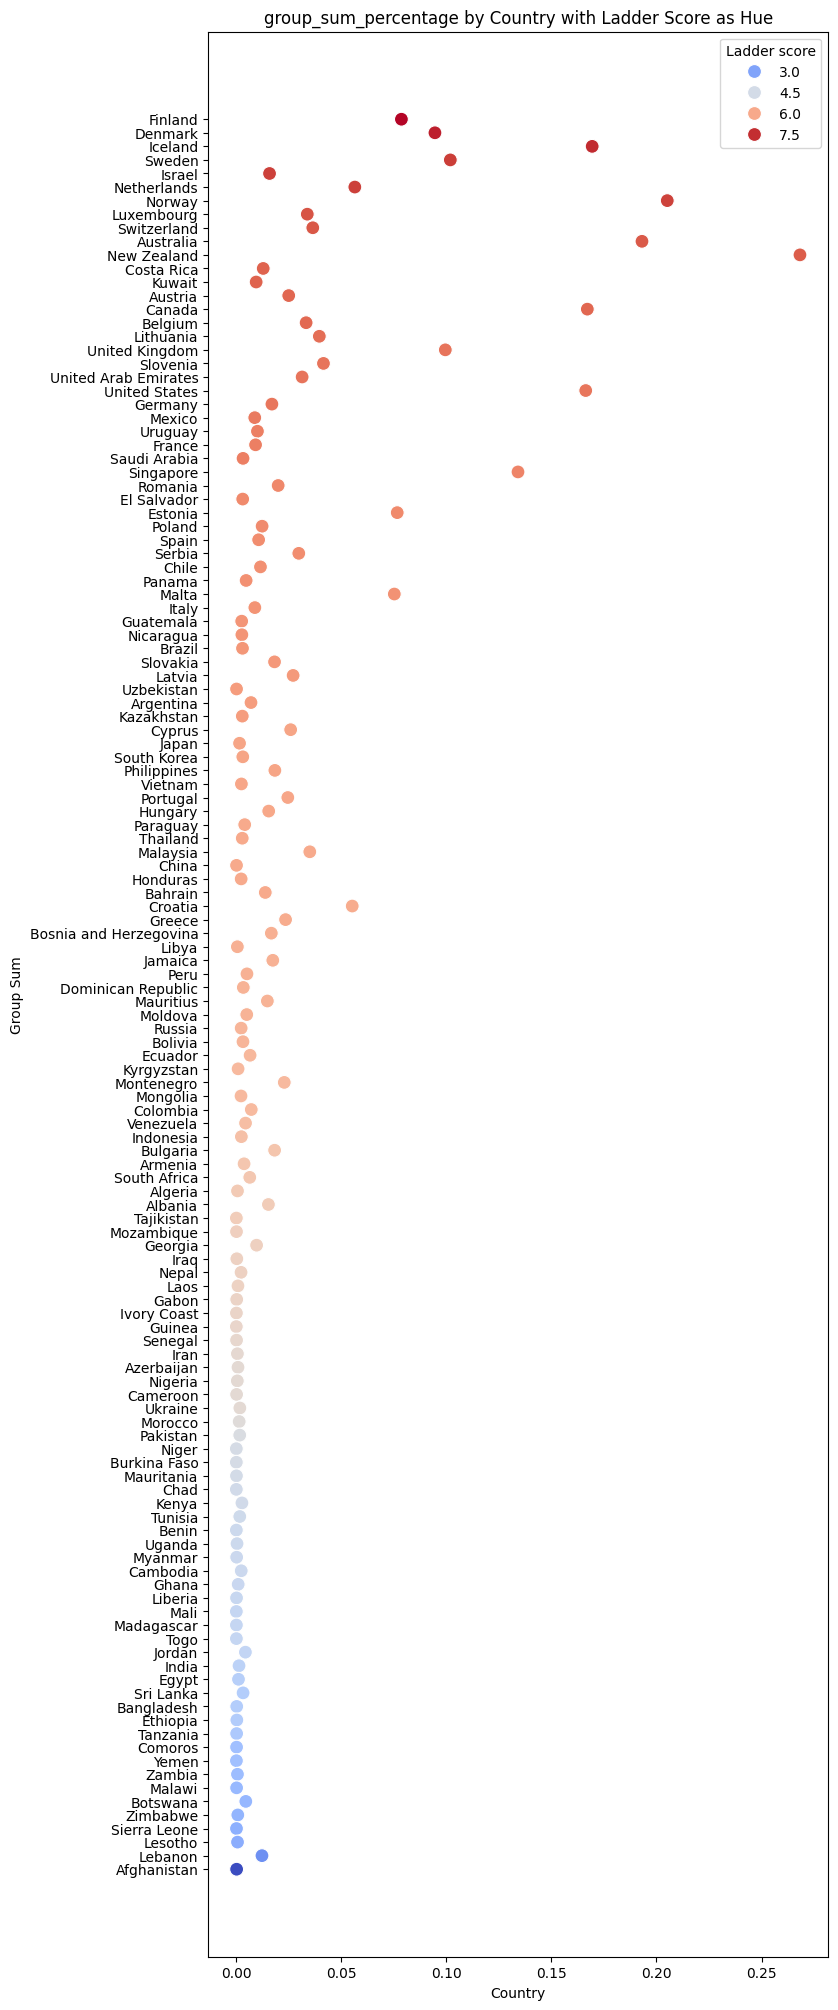

In [118]:
world_personas_happines['group_sum_percentage'] = (world_personas_happines['group_sum'] / world_personas_happines['Population']) * 100
plt.figure(figsize=(8, 25))
sns.scatterplot(data=world_personas_happines, y="Country name", x="group_sum_percentage", hue="Ladder score", palette="coolwarm", s=100)
plt.title("group_sum_percentage by Country with Ladder Score as Hue")
plt.xlabel("Country")
plt.ylabel("Group Sum")
plt.show()

world_personas_happines = world_personas_happines.drop('group_sum_percentage', axis=1)

In [102]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


numerical_columns = world_personas_happines.select_dtypes(include=['float64', 'int64']).columns.tolist()
data_world = world_personas_happines[numerical_columns]

X = data_world.drop(columns=['Ladder score'])
y = data_world['Ladder score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


param_grid = {
    'n_estimators': [100, 200, 300, 500],  # Liczba drzew
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Współczynnik uczenia
    'max_depth': [3, 5, 7, 10],  # Głębokość drzewa   wysokie przeuczyc
    'min_child_weight': [1, 3, 5],  # Minimalna waga dziecka
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Procent danych do użycia w każdym drzewie
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],  # Procent cech do użycia w każdym drzewie
    'gamma': [0, 0.1, 0.2],  # Parametr regularyzacji
    'alpha': [0, 0.1, 0.2],  # L1 regularization term on weights
    'lambda': [0, 0.1, 0.2]  # L2 regularization term on weights
}


model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

"""# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1) #wolneee
"""

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1, random_state=42)
## mse daje ze mniejsze wartosci sa lepsze a neg daje ujemne wartosci i dobieramy mniej negatywny
## Losowy dobor hiperparametrow

random_search.fit(X_train_scaled, y_train)


print(f'Best parameters: {random_search.best_params_}')
print(f'Best score: {random_search.best_score_}')


best_model = random_search.best_estimator_


y_pred = best_model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


importance = best_model.feature_importances_


feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 0.7, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.01, 'lambda': 0.1, 'gamma': 0, 'colsample_bytree': 0.7, 'alpha': 0}
Best score: -0.5106380126848847
Mean Squared Error: 0.3196394954014824
                                      Feature  Importance
13                           Infant mortality    0.239424
15                   Maternal mortality ratio    0.161476
14                            Life expectancy    0.092491
17                    Physicians per thousand    0.072891
19  Population: Labor force participation (%)    0.041453
4                                  Birth Rate    0.033981
16           Out of pocket health expenditure    0.032177
27                              %of_Sangwinik    0.031520
21                          Unemployment rate    0.024065
11                             Gasoline Price    0.021909
3                           Armed Forces size 

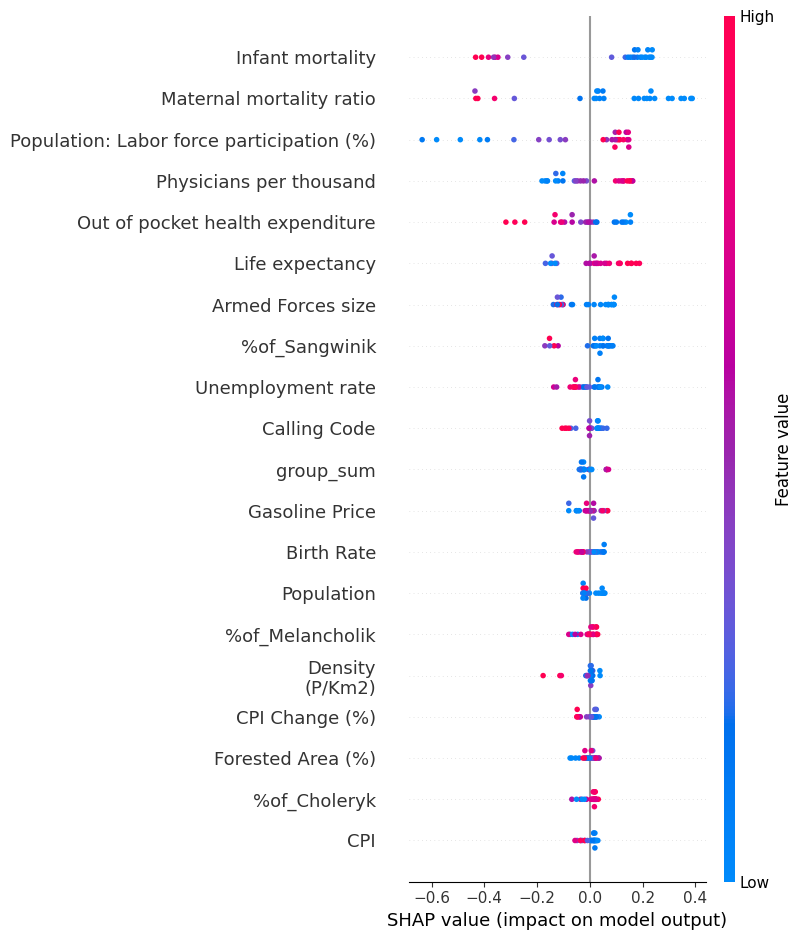

In [103]:
import shap



explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_scaled)


shap.summary_plot(shap_values, X_test, feature_names=X.columns)



| angielski              | polski                                    |
|-----------------------------------------------------|--------------------------------------------------------|
| Country                                             | Kraj                                                   |
| Density (P/Km2)                                     | Gęstość zaludnienia (os./km²)                          |
| Abbreviation                                        | Skrót                                                  |
| Agricultural Land (%)                               | Grunty rolne (%)                                       |
| Land Area (Km2)                                     | Powierzchnia (km²)                                     |
| Armed Forces size                                   | Wielkość sił zbrojnych                                 |
| Birth Rate                                          | Wskaźnik urodzeń                                       |
| Calling Code                                        | Kod telefoniczny                                       |
| Capital/Major City                                  | Stolica / Główne miasto                                |
| Co2-Emissions                                       | Emisje CO2 (kilotony)                                  |
| CPI                                                 | Indeks cen konsumpcyjnych (CPI)                        |
| CPI Change (%)                                      | Zmiana CPI (%)                                         |
| Currency-Code                                       | Kod waluty                                             |
| Fertility Rate                                      | Wskaźnik dzietności                                    |
| Forested Area (%)                                   | Obszar leśny (%)                                       |
| Gasoline Price                                      | Cena benzyny (USD)                                     |
| GDP                                                 | PKB (USD)                                              |
| Infant mortality                                    | Śmiertelność niemowląt (na 1000 urodzeń)               |
| Largest city                                        | Największe miasto                                      |
| Life expectancy                                     | Oczekiwana długość życia (lata)                        |
| Maternal mortality ratio                           | Wskaźnik śmiertelności matek                           |
| Minimum wage                                        | Płaca minimalna (USD)                                  |
| Official language                                   | Język urzędowy                                         |
| Out of pocket health expenditure                   | Wydatki zdrowotne z kieszeni (%)                       |
| Physicians per thousand                            | Lekarze na 1000 mieszkańców                            |
| Population                                          | Populacja                                              |
| Population: Labor force participation (%)          | Udział w siły roboczej (%)                             |
| Tax revenue (%)                                     | Dochody podatkowe (% PKB)                              |
| Total tax rate                                      | Całkowita stawka podatkowa (%)                         |
| Unemployment rate                                   | Stopa bezrobocia (%)                                   |
| Urban_population                                    | Populacja miejska                                      |


In [104]:
shap_df = pd.DataFrame(shap_values, columns=X.columns)
positive_shap_values = shap_df[shap_df > 0].mean()

negative_shap_values = shap_df[shap_df < 0].mean()

print("Średni dodatni wpływ SHAP dla każdej cechy:")
print(positive_shap_values.sort_values(ascending=0))

print("\nŚredni ujemny wpływ SHAP dla każdej cechy:")
print(negative_shap_values.sort_values(ascending=0))


Średni dodatni wpływ SHAP dla każdej cechy:
Maternal mortality ratio                     0.189873
Infant mortality                             0.185297
Physicians per thousand                      0.124016
Population: Labor force participation (%)    0.110436
Life expectancy                              0.083580
Out of pocket health expenditure             0.079187
Armed Forces size                            0.071201
%of_Sangwinik                                0.050193
group_sum                                    0.048207
Population                                   0.044651
Unemployment rate                            0.035424
Gasoline Price                               0.029261
Birth Rate                                   0.029034
Calling Code                                 0.028664
Agricultural Land( %)                        0.023102
Fertility Rate                               0.020507
Co2-Emissions                                0.020028
Forested Area (%)                     

In [105]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


numerical_columns = world_personas_happines.select_dtypes(include=['float64', 'int64']).columns.tolist()
data_world = world_personas_happines[numerical_columns]

X = data_world.drop(columns=['Ladder score'])
y = data_world['Ladder score']

scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X)



"""param_grid = {
    'n_estimators': [100, 200, 300, 500],  # Liczba drzew
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Współczynnik uczenia ------------------------------------------------ wysokie przeuczyc
    'max_depth': [3, 5, 7, 10],  # Głębokość drzewa  ------------------------------------------------ wysokie przeuczyc
    'min_child_weight': [1, 3, 5],  # Minimalna waga dziecka ------------------------------------------------ niskie przeuczyc
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Procent danych do użycia w każdym drzewie------------------------------------------------ 1 przeuczyc
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],  # Procent cech do użycia w każdym drzewie------------------------------------------------ 1 przeuczyc
    'gamma': [0, 0.1, 0.2],  # Parametr regularyzacji------------------------------------------------ niskie przeuczyc
    'alpha': [0, 0.1, 0.2],  # L1 regularization term on weights------------------------------------------------ niskie przeuczyc
    'lambda': [0, 0.1, 0.2]  # L2 regularization term on weights------------------------------------------------ niskie przeuczyc
}
"""

model2 = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    learning_rate=0.3,
    max_depth=15,
    min_child_weight = 1,
    subsample = 1,
    colsample_bytree = 1,
    gamma = 0,
    alpha = 0,
    random_state=42
)

model2.fit(X_train_scaled2, y)

importance2 = model2.feature_importances_


feature_importance2 = pd.DataFrame({'Feature': X.columns, 'Importance': importance2})
feature_importance2 = feature_importance2.sort_values(by='Importance', ascending=False)
print(feature_importance2)

                                      Feature    Importance
13                           Infant mortality  3.150998e-01
15                   Maternal mortality ratio  2.646375e-01
19  Population: Labor force participation (%)  1.030764e-01
16           Out of pocket health expenditure  7.819808e-02
27                              %of_Sangwinik  4.655199e-02
24                               %of_Choleryk  4.085487e-02
17                    Physicians per thousand  2.728513e-02
21                          Unemployment rate  1.785335e-02
11                             Gasoline Price  1.627074e-02
6                               Co2-Emissions  1.346896e-02
26                            %of_Melancholik  1.163538e-02
3                           Armed Forces size  9.524530e-03
14                            Life expectancy  7.741774e-03
20                             Total tax rate  7.148679e-03
23                                  group_sum  6.893591e-03
1                       Agricultural Lan

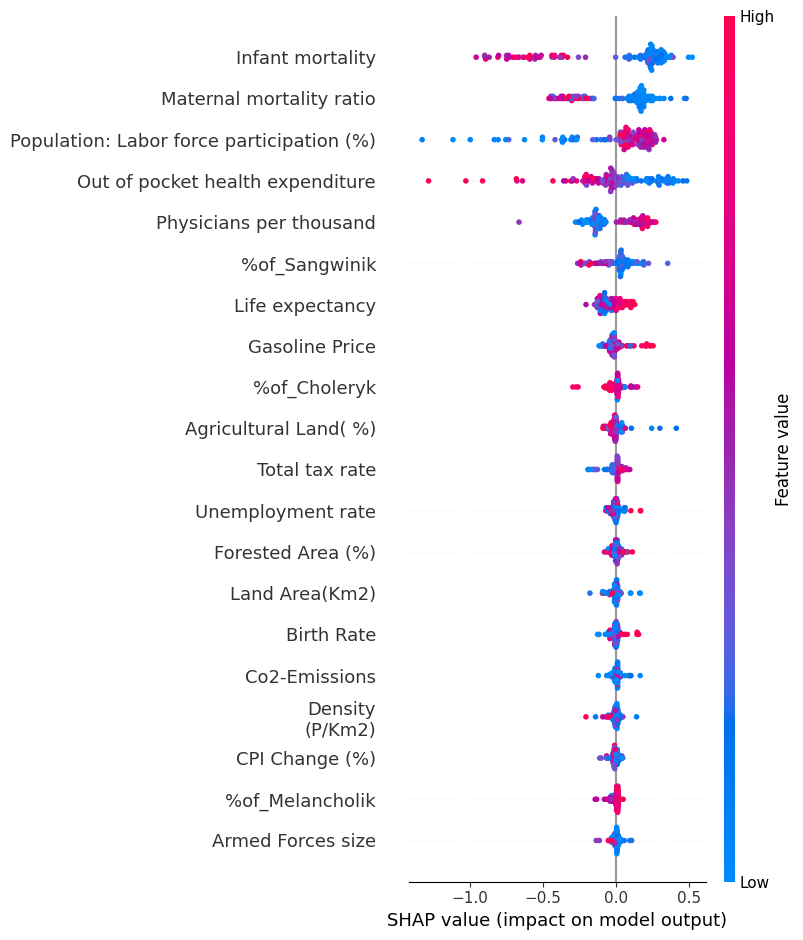

In [106]:

explainer2 = shap.TreeExplainer(model2)
shap_values2 = explainer2.shap_values(X_train_scaled2)


shap.summary_plot(shap_values2, X, feature_names=X.columns)


In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso


param_grid_lasso = {
    'alpha': np.logspace(-4, 4, 20),
    'max_iter': [1000, 5000, 10000]
}


lasso_model = Lasso()


random_search_lasso = RandomizedSearchCV(estimator=lasso_model, param_distributions=param_grid_lasso, n_iter=50,
                                   scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1, random_state=42)


random_search_lasso.fit(X_train_scaled, y_train)


print(f'Best parameters: {random_search_lasso.best_params_}')
print(f'Best score: {random_search_lasso.best_score_}')

best_lasso_model = random_search_lasso.best_estimator_


y_pred_lasso = best_lasso_model.predict(X_test_scaled)


mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression Mean Squared Error: {mse_lasso}')

importance_lasso = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(best_lasso_model.coef_)})
importance_lasso = importance_lasso.sort_values(by='Importance', ascending=False)


print(importance_lasso)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'max_iter': 1000, 'alpha': 0.08858667904100823}
Best score: -0.6632420081198152
Lasso Regression Mean Squared Error: 0.29359343306148555
                                      Feature  Importance
14                            Life expectancy    0.341404
17                    Physicians per thousand    0.286090
16           Out of pocket health expenditure    0.193030
21                          Unemployment rate    0.152406
4                                  Birth Rate    0.119982
15                   Maternal mortality ratio    0.049197
0                            Density\n(P/Km2)    0.016746
1                       Agricultural Land( %)    0.001086
7                                         CPI    0.000000
18                                 Population    0.000000
26                            %of_Melancholik    0.000000
25                              %of_Flegmatyk    0.000000
24                           